## A/B Testing: US Open Viewership

Testing US Open Finals (tennis) viewership figures over the years between the ATP and WTA. 

##### Null hypothesis: 
There is no significant difference between the viewership figures for the finals.

##### Alternate hypthesis: 
There is a significant difference in the viewership figures for the finals.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Data collection

data = {
    'Year': [
        2000,2001,2002,2003,2004,
        2005,2006,2007,2008,2009,
        2010,2011,2012,2013,2014,
        2015,2016,2017,2018,2019,
        2020,2021,2022,2023,2024
    ]
    ,
    'ATP':[
        3.3,3.2,3.4,3.7,4.1,
        4.5,4.8,5.2,5.3,5.6,
        5.8,6.0,6.2,6.4,6.5,
        6.7,6.9,7.1,7.4,7.6,
        4.1,6.8,7.0,7.3,7.5
    ],
    'WTA': [
        2.9,2.8,3.1,3.4,3.6,
        3.8,4.1,4.3,4.5,4.6,
        4.8,5.0,5.2,5.4,5.6,
        5.8,6.9,6.2,6.4,6.6,
        3.9,6.1,6.3,6.5,6.7
    ]
}

data = pd.DataFrame(data)
data.set_index('Year',inplace=True)
data

,ATP,WTA
Year,,
2000,3.3,2.9
2001,3.2,2.8
2002,3.4,3.1
2003,3.7,3.4
2004,4.1,3.6
2005,4.5,3.8
2006,4.8,4.1
2007,5.2,4.3
2008,5.3,4.5


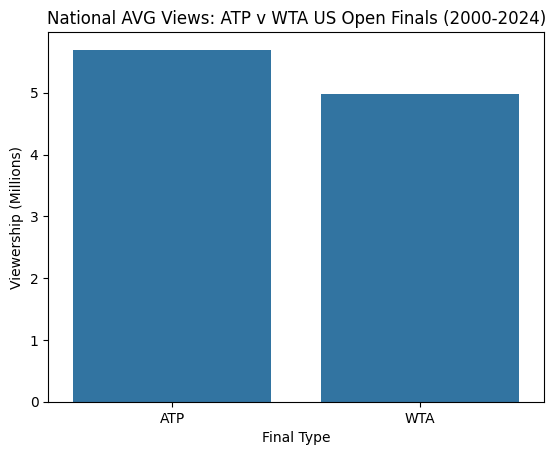

In [36]:
# Calculate avg viewership

mean_viewership = data[['ATP', 'WTA']].mean().reset_index()

# Rename columns

mean_viewership.columns = ['Final Type', 'Average Views']

# Plot the results

sns.barplot(x='Final Type', y='Average Views', data=mean_viewership)
plt.title("""National AVG Views: ATP v WTA US Open Finals (2000-2024)""")
plt.ylabel('Viewership (Millions)')
plt.xticks([0, 1], ['ATP', 'WTA'])
plt.show()

In [27]:
# Perform two-sample t-test

t_stat, p_value = stats.ttest_ind(data['ATP'], data['WTA'])


# Draw conclusions based on the results

print(f"T-Statistic: {t_stat:.2f}. \n\nThe group means of the ATP and WTA are about {t_stat:.0f} standard deviations away from each other.")


print(f"\nP-Value: {p_value:.2f}.")
if p_value > 0.05:
    print('\nThere is no significant difference between the viewership figures for the finals.')
else:
    print('\nThere is a significant difference in the viewership figures for the finals.')


T-Statistic: 1.84. 

The group means of the ATP and WTA are about 2 standard deviations away from each other.

P-Value: 0.07.

There is no significant difference between the viewership figures for the finals.


In [34]:
# Calculating confidence intervals to better understand ATP and WTA data

def confidence_interval(views, confidence=0.95):
    n = len(views)
    mean = np.mean(views)
    std_err = stats.sem(views)  # Standard error of the mean
    margin_of_error = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)  # Margin of error
    return mean - margin_of_error, mean + margin_of_error

# Calculate confidence intervals for both groups
ci_atp = confidence_interval(data['ATP'])
ci_wta = confidence_interval(data['WTA'])

print(f"95% Confidence Interval for ATP US Open Finals: {ci_atp[0]:.2f} - {ci_atp[1]:.2f} million views")
print(f"\n95% Confidence Interval for WTA US Open Finals: {ci_wta[0]:.2f} - {ci_wta[1]:.2f} million views")
print('\nThe true population parameters of ATP US Open Finals and WTA Finals are 95% likely to fall in this range')

95% Confidence Interval for ATP US Open Finals: 5.10 - 6.29 million views

95% Confidence Interval for WTA US Open Finals: 4.44 - 5.52 million views

The true population parameters of ATP US Open Finals and WTA Finals are 95% likely to fall in this range
